<a href="https://colab.research.google.com/github/maria761/gammalang/blob/master/Copy_of_age_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/laxmimerit/Image-Dataset-for-Age-Prediction.git

Cloning into 'Image-Dataset-for-Age-Prediction'...
remote: Enumerating objects: 47107, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 47107 (delta 0), reused 2 (delta 0), pack-reused 47104
Receiving objects: 100% (47107/47107), 1.37 GiB | 40.33 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (24110/24110), done.


In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 121kB/s 
     |████████████████████████████████| 6.8MB 34.4MB/s 
     |████████████████████████████████| 983kB 48.1MB/s 
     |████████████████████████████████| 266kB 54.3MB/s 
     |████████████████████████████████| 1.9MB 25.4MB/s 
     |████████████████████████████████| 1.2MB 35.7MB/s 
     |████████████████████████████████| 471kB 50.6MB/s 
     |████████████████████████████████| 901kB 35.2MB/s 
     |████████████████████████████████| 3.3MB 36.4MB/s 
  Created wheel for ktrain: filename=ktrain-0.26.3-cp37-none-any.whl size=25282380 sha256=4e57f7b28cf71c0f2235d9dcd92c6a96efae29237bf6c2457a3771aaadb74c21
  Stored in directory: /root/.cache/pip/wheels/16/05/be/d6e659b3349016b1059e19fa028f165af4eeae2c196f329112
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993223 sha256=bbbc7fbc67588f6b09e3a28466d176e9619735320342893ba42a201d8c1e21e3
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7d

In [ ]:
%matplotlib inline
import os
import ktrain
from ktrain import vision as vis


In [ ]:
import re
pattern = r'([^/]+)_\d+_\d+_\d+.jpg$'
p=re.compile(pattern)
r=p.search('100_0_0_20170112213500903.jpg')
print(r.group(1))

100


In [ ]:
DATADIR='/content/Image-Dataset-for-Age-Prediction/images'

In [ ]:
(train_data ,test_data,preproc )= vis.images_from_fname(DATADIR ,  pattern=pattern ,is_regression=True ,random_state=42 ) 

/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/39_1_20170116174525125.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/61_1_20170109142408075.jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-for-Age-Prediction/images/24_0_1_20170116220224657 .jpg -  skipping this file
  warnings.warn('Could not extract target for %s -  skipping this file'% (fname))
/usr/local/lib/python3.7/dist-packages/ktrain/vision/data.py:718: UserWarning: Could not extract target for /content/Image-Dataset-fo

['label']
       label
12304   24.0
6161    29.0
19807   40.0
21202   25.0
14941   14.0
['label']
       label
16139   32.0
14926   15.0
8979     1.0
12077   26.0
14568   36.0
Found 21690 validated image filenames.
Found 2411 validated image filenames.


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:679: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:580: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \
/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:679: UserWarning: is_regression=True was supplied but targets are strings - casting to floats
  warnings.warn('is_regression=True was supplied but targets are strings - casting to floats')


In [ ]:
vis.print_image_regression_models()

pretrained_resnet50: 50-layer Residual Network (pretrained on ImageNet)
resnet50: 50-layer Resididual Network (randomly initialized)
pretrained_mobilenet: MobileNet Neural Network (pretrained on ImageNet)
mobilenet: MobileNet Neural Network (randomly initialized)
pretrained_inception: Inception Version 3  (pretrained on ImageNet)
inception: Inception Version 3 (randomly initialized)
wrn22: 22-layer Wide Residual Network (randomly initialized)
default_cnn: a default LeNet-like Convolutional Neural Network


In [ ]:
model=vis.image_regression_model('pretrained_resnet50',train_data=train_data,val_data=test_data)

The normalization scheme has been changed for use with a pretrained_resnet50 model. If you decide to use a different model, please reload your dataset with a ktrain.vision.data.images_from* function.

Is Multi-Label? False
Is Regression? True
94773248/94765736 [==============================] - 1s 0us/step
pretrained_resnet50 model created.


In [ ]:
learner= ktrain.get_learner(model=model ,train_data=train_data ,val_data= test_data,
                            batch_size=64)

In [ ]:
#learning rate =1e-4

In [ ]:
learner.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 355s 951ms/step - loss: 394.8299 - mae: 14.7264 - val_loss: 185.8306 - val_mae: 10.4349
Epoch 2/2
339/339 [==============================] - 319s 941ms/step - loss: 175.5125 - mae: 10.1281 - val_loss: 160.3302 - val_mae: 9.7675


In [ ]:
learner.freeze(15)

learner.fit_onecycle(1e-4,2)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/2
339/339 [==============================] - 376s 1s/step - loss: 107.9810 - mae: 7.7987 - val_loss: 300.1584 - val_mae: 13.7346
Epoch 2/2
339/339 [==============================] - 364s 1s/step - loss: 46.0001 - mae: 5.1211 - val_loss: 64.6183 - val_mae: 5.7461


In [ ]:
predictor = ktrain.get_predictor(learner.model,preproc)

In [ ]:
test_data.filenames[10:20]

['18_1_0_20170105002457379.jpg',
 '34_0_0_20170117203227887.jpg',
 '27_1_2_20170116162057519.jpg',
 '25_0_0_20170117140947335.jpg',
 '49_0_3_20170119205456552.jpg',
 '24_1_4_20170103223940759.jpg',
 '30_0_3_20170119195732475.jpg',
 '2_1_3_20161220144445968.jpg',
 '38_1_1_20170116154709016.jpg',
 '45_0_0_20170113182911812.jpg']

In [ ]:
def show_prediction(fname):
  fname=DATADIR +'/'+fname
  pred = round(predictor.predict_filename(fname)[0])
  actual= int (p.search(fname).group(1))
  vis.show_image(fname)
  print("predicted age :%s || acual age :%s" % (pred,actual))

predicted age :43 || acual age :45


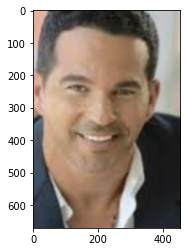

In [ ]:
show_prediction('45_0_0_20170113182911812.jpg')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


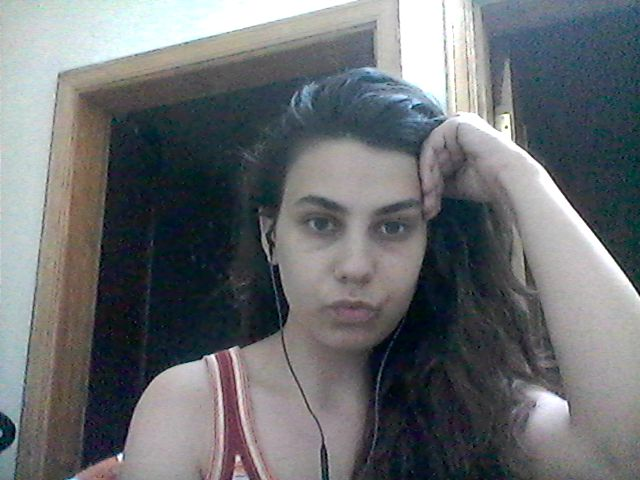

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
def real_prediction(fname):

  pred = round(predictor.predict_filename(fname)[0])
  
  vis.show_image(fname)
  print("predicted age :%s " % pred)

predicted age :25 


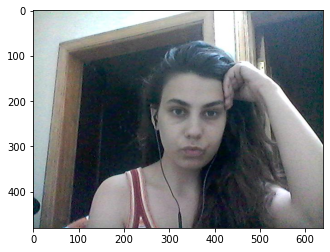

In [ ]:
real_prediction('photo.jpg')

In [ ]:
predictor.save('/content/age predection')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
!zip -r/content/age_predictor.zip / content /age predection


zip error: Invalid command arguments (short option '/' not supported)
